# Import CDF lib

In [1]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf
import os
os.environ["CDF_LIB"] = "C:\\Program Files\\CDF_Distribution\\cdf39_0-dist\\lib"

# Import local lib

In [2]:
import sys

# import JUICE lib
sys.path.append('../lib/')

import juice_cdf_lib as juice_cdf

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Read CDF file

In [4]:
#data_dir = 'C:\\Users\\tsuch\VSCode\\python\\juice\\data\\Data-sample-v0.2.0\\'
#cdf_file = data_dir + 'JUICE_L1a_RPWI-HF-SID2_20000101T000459-20000101T000700_V01___HF_20210920-1007.ccs.cdf'
#cdf_file = data_dir + 'JUICE_L1a_RPWI-HF-SID2_20230419T135849-20230419T141229_V01___RPR1_52000000_2023.109.16.17.21.607.cdf'
#cdf_file = data_dir + 'JUICE_L1a_RPWI-HF-SID2_20230419T141231-20230419T141402_V01___RPR1_52000001_2023.109.17.51.54.600'

#cdf_file = data_dir + 'JUICE_L1a_RPWI-HF-SID2_20000101T000459-20000101T000700_V01_v0.2.2-new.cdf'
#cdf_file = data_dir + 'JUICE_L1a_RPWI-HF-SID2_20230419T141231-20230419T141402_V01_v0.2.2-new.cdf'

#data_dir = 'C:\\share\\Linux\\RESULTS\\SID2_test_202306\\OUTPUT\\RPWI_S8_272_2023_06_19_14_49_06_32_1F\\ARC\\TMIDX_00000.bin\\'
#cdf_file = data_dir + \
#    'JUICE_L1a_RPWI-HF-SID2_20000101T000304-20000101T000308_V01___TMIDX_00000.bin.cdf'
#data_dir = 'C:\\share\\Linux\\RESULTS\\SID2_test_202306\\OUTPUT\\RPWI_S8_272_2023_06_19_14_58_37_64_3F\\ARC\\TMIDX_00000.bin\\'
#cdf_file = data_dir + \
#    'JUICE_L1a_RPWI-HF-SID2_20000101T000150-20000101T000154_V01___TMIDX_00000.bin.cdf'

data_dir = 'C:\\Users\\tsuch\VSCode\\python\\juice\\data\\SID2_20230619\\'
data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000131-20000101T000139_V01___TMIDX_00000.bin.cdf'


cdf = pycdf.CDF(data_dir+data_name)


get waveform

In [5]:
data = juice_cdf.juice_getdata_hf_sid02(cdf)

In [6]:
cdf

<CDF:
BG_downlink: CDF_UINT1 [28]
BG_select: CDF_UINT1 [28]
BG_subtract: CDF_UINT1 [28]
Epoch: CDF_TIME_TT2000 [28]
Eu_i: CDF_REAL4 [28, 32768]
Eu_q: CDF_REAL4 [28, 32768]
Ev_i: CDF_REAL4 [28, 32768]
Ev_q: CDF_REAL4 [28, 32768]
Ew_i: CDF_REAL4 [28, 32768]
Ew_q: CDF_REAL4 [28, 32768]
FFT_window: CDF_UINT1 [28]
N_block: CDF_UINT1 [28]
N_samp: CDF_UINT2 [28]
N_step: CDF_UINT2 [28]
Pol_sep_SW: CDF_UINT1 [28]
Pol_sep_thres: CDF_UINT1 [28]
RFI_rejection: CDF_UINT1 [28]
SCET: CDF_REAL8 [28]
T_HF_FPGA: CDF_INT2 [28]
T_RWI_U: CDF_INT2 [28]
T_RWI_W: CDF_INT2 [28]
U_selected: CDF_UINT1 [28]
V_selected: CDF_UINT1 [28]
W_selected: CDF_UINT1 [28]
cal_signal: CDF_UINT1 [28]
complex: CDF_UINT1 [28]
decimation: CDF_UINT1 [28]
freq_step: CDF_REAL4 [28, 32768]
freq_width: CDF_REAL4 [28, 32768]
frequency: CDF_REAL4 [28, 32768]
header_size: CDF_UINT1 [28]
onboard_cal: CDF_UINT1 [28]
overflow: CDF_UINT1 [28, 32768]
overflow_U: CDF_UINT1 [28]
overflow_V: CDF_UINT1 [28]
overflow_W: CDF_UINT1 [28]
pol: CDF_UIN

get power spectra

In [ ]:
spec = juice_cdf.juice_getspec_hf_sid02(data)

# Conversion factor (Raw value @ ADC input to dBm)
cf = -104.1

spec.Eu_power_dBm = 10.0*np.log10(spec.Eu_power) + cf
spec.Ev_power_dBm = 10.0*np.log10(spec.Ev_power) + cf
spec.Ew_power_dBm = 10.0*np.log10(spec.Ew_power) + cf

# Plot raw waveform

<bound method Figure.show of <Figure size 576x576 with 3 Axes>>

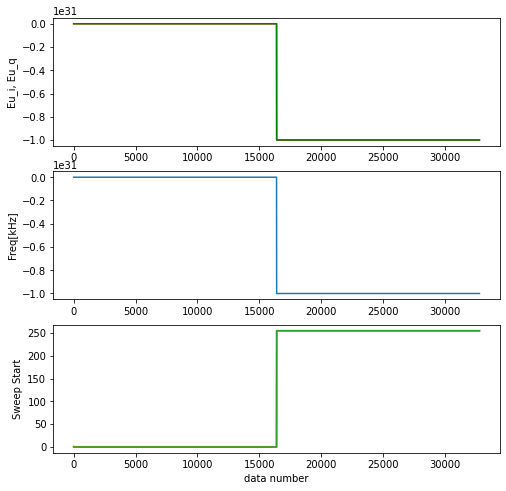

In [7]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.plot(data.Eu_i[0][:], '-r')
ax1.plot(data.Eu_q[0][:], '-g')
ax2.plot(data.frequency[0][:])
ax3.plot(data.sweep_start[0][:])
ax3.plot(data.sweep_start[1][:])
ax3.plot(data.sweep_start[2][:])

ax3.set_xlabel('data number')
ax1.set_ylabel('Eu_i, Eu_q')
ax2.set_ylabel('Freq[kHz]')
ax3.set_ylabel('Sweep Start')

#xlim=[-100,80000]
#ax1.set_xlim(xlim)
#ax2.set_xlim(xlim)
#ax3.set_xlim(xlim)
fig.show

# Plot spectra

Frequency vs. Power

In [ ]:
plt.plot(spec.frequency, spec.Eu_power_dBm[:, 0])
plt.plot(spec.frequency, spec.Ev_power_dBm[:, 0])
plt.plot(spec.frequency, spec.Ew_power_dBm[:, 0])

plt.xlabel('Frequency [kHz]')
plt.ylabel('Power [dBm@ADC input]')

plt.show()

ft diagram

In [ ]:
import matplotlib.colors as colors  # import it to display in logscale

fig = plt.figure(figsize=(12, 4))
#mesh = plt.pcolormesh(spec.epoch, spec.frequency,
#                      spec.Eu_power, cmap='inferno', norm=colors.LogNorm())
mesh = plt.pcolormesh(spec.epoch, spec.frequency,
                      spec.Eu_power_dBm, cmap='inferno')
plt.colorbar(mesh, label='Power [dBm@ADC input]')
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time')